In [1]:
import numpy as np
from sklearn.datasets import load_iris
import warnings

warnings.filterwarnings('ignore')

iris = load_iris()

In [2]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [3]:
from sklearn.model_selection import train_test_split

train, test, labels_train, labels_test = train_test_split(iris.data, iris.target,
                                                          train_size=0.8, test_size=0.2,
                                                          random_state=2022)
categorical_features = np.argwhere(
    np.array([len(set(iris.data[:, x])) for x in range(iris.data.shape[1])]) <= 10).flatten()

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

lr = RandomForestClassifier(random_state=2022)
lr.fit(train, labels_train)

RandomForestClassifier(random_state=2022)

In [5]:
pred_origin = lr.predict_proba(test)
pred_origin = np.argmax(pred_origin, axis=1)

In [6]:
import sys

sys.path.append('..')
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(train, feature_names=iris.feature_names,
                                                   categorical_features=categorical_features, verbose=False,
                                                   mode='classification', random_state=2022)

0.06954008348136297
[('1.30 < petal width (cm) <= 1.80', 1.6725297759020177), ('4.30 < petal length (cm) <= 5.10', 1.094522278116172), ('5.75 < sepal length (cm) <= 6.43', 0.07914768265454465), ('sepal width (cm) <= 2.80', -0.036317855260066687)]
[-0.036317855260066687, 0.07914768265454465, 1.094522278116172, 1.6725297759020177]
['sepal width (cm) <= 2.80', '5.75 < sepal length (cm) <= 6.43', '4.30 < petal length (cm) <= 5.10', '1.30 < petal width (cm) <= 1.80']


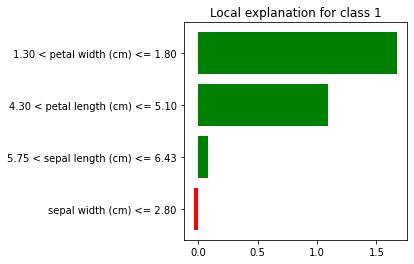

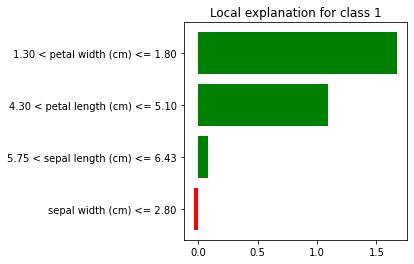

In [7]:
exp = explainer.explain_instance(test[25], lr.predict_proba, num_features=4, labels=(0, 1, 2))
print(exp.local_pred[0])
exp.as_pyplot_figure(label=1)

In [8]:
import tqdm as td

pred_lime = []
for i in td.tqdm(test):
    exp = explainer.explain_instance(i, lr.predict_proba, num_features=4, labels=(0, 1, 2)
                                     , model_regressor='ensemble'
                                     )
    # print(exp.local_pred)
    pred_lime.append([exp.local_pred[0], exp.local_pred[1], exp.local_pred[2]])

100%|██████████| 30/30 [00:16<00:00,  1.79it/s]


In [9]:
pred_lime = np.argmax(pred_lime, axis=1)
pred_lime

array([2, 2, 0, 2, 0, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1,
       2, 0, 2, 1, 2, 0, 1, 2], dtype=int64)

In [10]:
from sklearn.metrics import classification_report

print('\nClassification Report:\n', classification_report(labels_test, pred_origin, digits=4))


Classification Report:
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000         9
           1     0.8000    1.0000    0.8889         8
           2     1.0000    0.8462    0.9167        13

    accuracy                         0.9333        30
   macro avg     0.9333    0.9487    0.9352        30
weighted avg     0.9467    0.9333    0.9343        30



In [11]:
print('\nClassification Report:\n', classification_report(labels_test, pred_lime, digits=4))


Classification Report:
               precision    recall  f1-score   support

           0     1.0000    0.7778    0.8750         9
           1     0.6667    1.0000    0.8000         8
           2     1.0000    0.8462    0.9167        13

    accuracy                         0.8667        30
   macro avg     0.8889    0.8746    0.8639        30
weighted avg     0.9111    0.8667    0.8731        30



In [12]:
print('\nClassification Report:\n', classification_report(pred_origin, pred_lime, digits=4))


Classification Report:
               precision    recall  f1-score   support

           0     1.0000    0.7778    0.8750         9
           1     0.8333    1.0000    0.9091        10
           2     1.0000    1.0000    1.0000        11

    accuracy                         0.9333        30
   macro avg     0.9444    0.9259    0.9280        30
weighted avg     0.9444    0.9333    0.9322        30

